### Application :
          Noise Removal

In [0]:
# Unsupervised learning with CNN
#using Functional Programming
#imagenet has 100 of real object's pic and each object has 1000 pics of it 

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.astype('float32')/255     #we are changing it into float so that value zero na ho 
x_test = x_test.astype('float32')/255

In [4]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
# adding noise into image as mnist has no noise
noise_factor = 0.5

x_train_noisy = x_train + noise_factor*np.random.normal(loc = 0.0,
                                                       scale = 1.0,
                                                       size = x_train.shape)

x_test_noisy = x_test + noise_factor*np.random.normal(loc = 0.0,
                                                       scale = 1.0,
                                                       size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

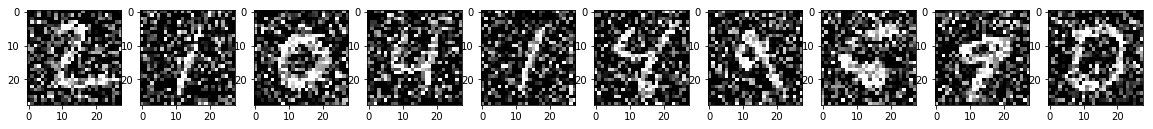

In [6]:
n = 10 
plt.figure(figsize = (20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    
plt.show()

In [0]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [8]:
input_img = Input(shape= (28, 28, 1))
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2), padding = 'same') (x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D((2,2), padding = 'same') (x)      #(7,7,32)

#padding same use krne se conv2D change nhi kr paa rha h output ka size bcz padding same output same rkhegaa

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2)) (x)  

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2)) (x)  


decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()



W0702 21:58:07.366448 140381628938112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 21:58:07.401074 140381628938112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 21:58:07.407457 140381628938112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 21:58:07.432841 140381628938112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 21:58:07.462862 140381628938112 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [9]:
autoencoder.fit(x_train_noisy, x_train, epochs = 100 , batch_size = 128,
               shuffle = True,
               validation_data = (x_test_noisy, x_test))

W0702 21:58:11.628648 140381628938112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 154us/step - loss: 0.1644 - val_loss: 0.1166
Epoch 2/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1119 - val_loss: 0.1070
Epoch 3/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1067 - val_loss: 0.1038
Epoch 4/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1040 - val_loss: 0.1018
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1022 - val_loss: 0.1008
Epoch 6/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1008 - val_loss: 0.0993
Epoch 7/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0998 - val_loss: 0.0988
Epoch 8/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0990 - val_loss: 0.0979
Epoch 9/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0984 - val_loss: 0.

In [0]:
final = autoencoder.predict(x_test_noisy)


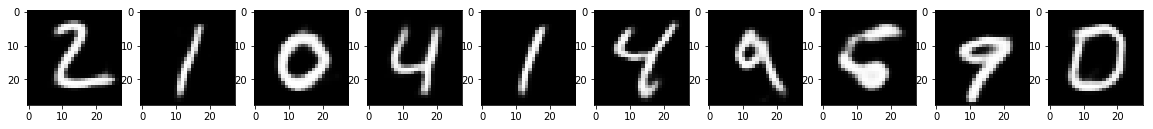

In [13]:
n = 10 
plt.figure(figsize = (20, 2))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(final[i].reshape(28,28))
    plt.gray()
    
plt.show()